In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


/tmp/ipython-input-3281135037.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'TRUE': 1, 'FALSE': 0})
/tmp/ipython-input-3281135037.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'TRUE': 1, 'FALSE': 0})
/tmp/ipython-input-3281135037.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcastin


===== Basic Dataset Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 500 non-null    int64  
 1   Gender              500 non-null    object 
 2   BMI                 500 non-null    float64
 3   Snoring             500 non-null    int64  
 4   Oxygen_Saturation   500 non-null    float64
 5   AHI                 500 non-null    float64
 6   ECG_Heart_Rate      500 non-null    int64  
 7   SpO2                500 non-null    float64
 8   Nasal_Airflow       500 non-null    float64
 9   Chest_Movement      500 non-null    float64
 10  Diagnosis_of_SDB    381 non-null    object 
 11  Severity            369 non-null    object 
 12  Treatment_Required  500 non-null    int64  
 13  CPAP                500 non-null    int64  
 14  Surgery             500 non-null    int64  
 15  Physician_Notes     500 n

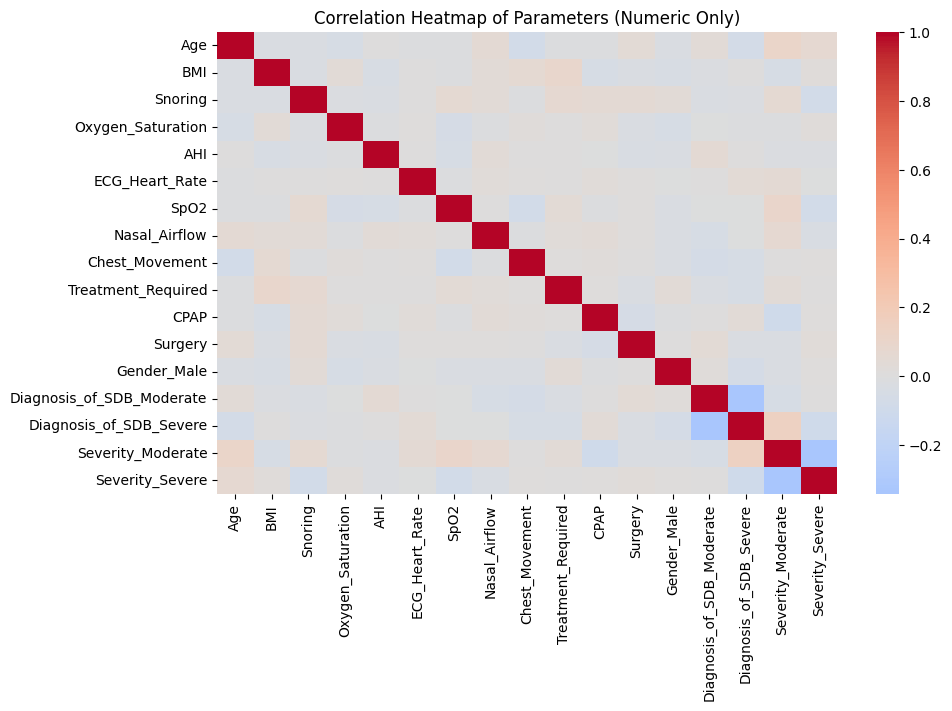

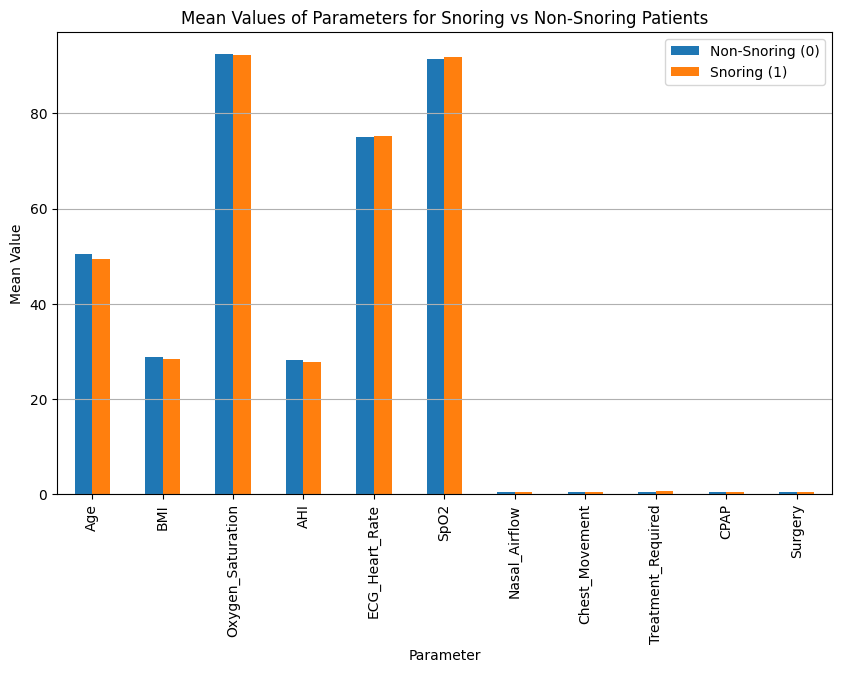

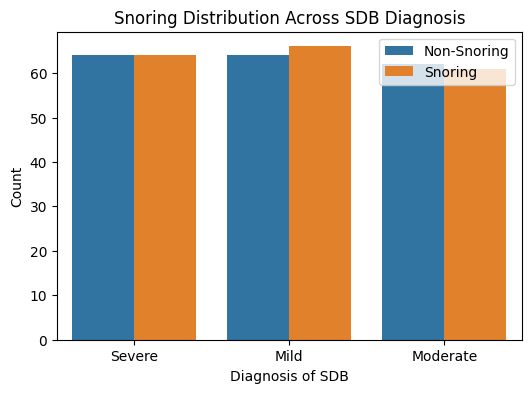


✅ Correlation results saved as 'snoring_correlation_results.csv' in /content/


In [ ]:
# ==========================================================
# Sleep Disorder Data Analysis - Snoring Relationship Study
# ==========================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Load dataset
# ----------------------------
file_path = "/content/drive/MyDrive/ssdb_dataset.csv"  # <-- update filename if needed
df = pd.read_csv(file_path)

# ----------------------------
# 2. Remove text-heavy columns
# ----------------------------
df = df.iloc[:, :-2]  # removes Physician_Notes and Patient_Symptoms columns

# ----------------------------
# 3. Drop Patient_ID (string column)
# ----------------------------
if 'Patient_ID' in df.columns:
    df = df.drop(columns=['Patient_ID'])

# ----------------------------
# 4. Convert boolean-like columns to numeric
# ----------------------------
bool_cols = ['Snoring', 'Treatment_Required', 'CPAP', 'Surgery']
for col in bool_cols:
    if col in df.columns:
        df[col] = (
            df[col].astype(str)
            .str.upper()
            .replace({'TRUE': 1, 'FALSE': 0})
            .astype(int)
        )

# ----------------------------
# 5. Encode categorical columns
# ----------------------------
cat_cols = ['Gender', 'Diagnosis_of_SDB', 'Severity']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# ----------------------------
# 6. Descriptive statistics
# ----------------------------
print("\n===== Basic Dataset Info =====")
print(df.info())
print("\n===== Descriptive Statistics =====")
print(df.describe())

# ----------------------------
# 7. Correlation analysis
# ----------------------------
corr_snoring = df_encoded.corr(numeric_only=True)['Snoring'].sort_values(ascending=False)
print("\n===== Correlation of Snoring with Other Parameters =====")
print(corr_snoring)

# ----------------------------
# 8. Correlation Heatmap (numeric-only data)
# ----------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(numeric_only=True), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Parameters (Numeric Only)")
plt.show()

# ----------------------------
# 9. Bar plot: Mean values grouped by Snoring
# ----------------------------
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Snoring')
df_group = df.groupby('Snoring')[numeric_cols].mean().T

df_group.plot(kind='bar', figsize=(10,6))
plt.title("Mean Values of Parameters for Snoring vs Non-Snoring Patients")
plt.ylabel("Mean Value")
plt.xlabel("Parameter")
plt.legend(['Non-Snoring (0)', 'Snoring (1)'])
plt.grid(axis='y')
plt.show()

# ----------------------------
# 10. Diagnosis of SDB vs Snoring
# ----------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Diagnosis_of_SDB', hue='Snoring', data=df)
plt.title("Snoring Distribution Across SDB Diagnosis")
plt.xlabel("Diagnosis of SDB")
plt.ylabel("Count")
plt.legend(["Non-Snoring", "Snoring"])
plt.show()

# ----------------------------
# 11. Export correlation results (optional)
# ----------------------------
corr_snoring.to_csv("/content/snoring_correlation_results.csv")
print("\n✅ Correlation results saved as 'snoring_correlation_results.csv' in /content/")



In [ ]:


# Define the path to the zip file in your Drive
zip_file_path = '/content/drive/MyDrive/sleep data.zip'

# Define the extraction path
extract_path = '/content/'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# Unzip the file
if os.path.exists(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"✅ '{zip_file_path}' unzipped to '{extract_path}'")
else:
    print(f"❌ Error: '{zip_file_path}' not found. Please ensure the file is in your Google Drive.")

✅ '/content/drive/MyDrive/sleep data.zip' unzipped to '/content/'


In [ ]:
import os
import shutil

# Define the source and destination directories
source_dir = '/content/'
destination_dir = '/content/dataset' # Moving within the same directory as requested

# List of folders to move
folders_to_move = ['male', 'female']

# Move the folders
for folder_name in folders_to_move:
    source_folder_path = os.path.join(source_dir, folder_name)
    destination_folder_path = os.path.join(destination_dir, folder_name)

    if os.path.exists(source_folder_path):
        # If the destination is the same as the source, no action is needed
        if source_folder_path != destination_folder_path:
            shutil.move(source_folder_path, destination_folder_path)
            print(f"✅ Moved '{folder_name}' to '{destination_dir}'")
        else:
            print(f"ℹ️ Folder '{folder_name}' is already in the destination '{destination_dir}'. No action needed.")
    else:
        print(f"❌ Error: Folder '{folder_name}' not found in '{source_dir}'")

✅ Moved 'male' to '/content/dataset'
✅ Moved 'female' to '/content/dataset'


Average Pitch Frequency: 76.52 Hz
Snorer Type: Nose Snorer


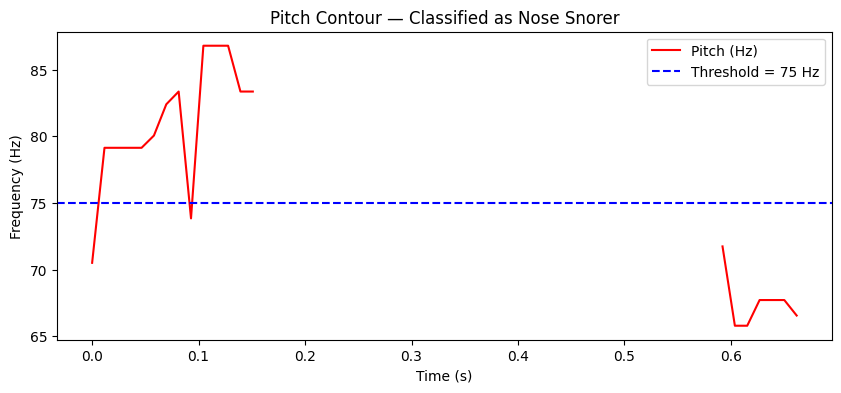

In [ ]:
# ==========================================
# STEP 1: Install dependencies (if not done)
# ==========================================
# !pip install librosa numpy matplotlib

# ==========================================
# STEP 2: Import Libraries
# ==========================================
import librosa
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# STEP 3: Load Audio File
# ==========================================
audio_path = "/content/dataset/female/F_105.wav"   # replace with your actual file path
y, sr = librosa.load(audio_path, sr=None)

# ==========================================
# STEP 4: Extract Pitch using librosa.pyin
# ==========================================
f0, voiced_flag, voiced_prob = librosa.pyin(
    y,
    fmin=librosa.note_to_hz('C2'),  # ~65 Hz
    fmax=librosa.note_to_hz('C7')   # ~2093 Hz
)

# Generate time axis
times = librosa.times_like(f0, sr=sr)

# ==========================================
# STEP 5: Compute Average Pitch
# ==========================================
avg_pitch = np.nanmean(f0)
print(f"Average Pitch Frequency: {avg_pitch:.2f} Hz")

# ==========================================
# STEP 6: Classify Snorer Type
# ==========================================
if avg_pitch > 75:
    snorer_type = "Mouth Snorer"
else:
    snorer_type = "Nose Snorer"

print(f"Snorer Type: {snorer_type}")

# ==========================================
# STEP 7: Visualize Pitch Contour
# ==========================================
plt.figure(figsize=(10, 4))
plt.plot(times, f0, color='r', label='Pitch (Hz)')
plt.axhline(75, color='b', linestyle='--', label='Threshold = 75 Hz')
plt.title(f"Pitch Contour — Classified as {snorer_type}")
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.show()


In [ ]:
# ======================================
# STEP 1: Install dependencies
# ======================================
!pip install -q librosa matplotlib numpy gradio

# ======================================
# STEP 2: Imports
# ======================================
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr

# ======================================
# STEP 3: Feature Extraction + Pitch Analysis
# ======================================
def analyze_snore(audio_path):
    try:
        # Load audio
        y, sr = librosa.load(audio_path, sr=22050)

        # Features
        rms = np.mean(librosa.feature.rms(y=y))
        zcr = np.mean(librosa.feature.zero_crossing_rate(y=y))
        centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)

        # Pitch extraction
        pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
        pitch_values = pitches[magnitudes > np.percentile(magnitudes, 75)]
        avg_pitch = np.mean(pitch_values) if len(pitch_values) > 0 else 0

        # Classification
        snore_type = "😴 Mouth Snorer" if avg_pitch > 75 else "😌 Nose Snorer"

        # Plot waveform + spectrogram
        fig, ax = plt.subplots(2, 1, figsize=(10, 6))
        librosa.display.waveshow(y, sr=sr, ax=ax[0])
        ax[0].set_title("Waveform")

        spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        librosa.display.specshow(librosa.power_to_db(spec, ref=np.max), sr=sr, x_axis='time', y_axis='mel', ax=ax[1])
        ax[1].set_title("Mel Spectrogram")
        plt.tight_layout()

        # Show results
        feature_summary = (
            f"🎵 **RMS Energy:** {rms:.4f}\n"
            f"⚡ **Zero Crossing Rate:** {zcr:.4f}\n"
            f"🎚️ **Spectral Centroid:** {centroid:.2f}\n"
            f"🎤 **Average Pitch:** {avg_pitch:.2f} Hz\n\n"
            f"👉 **Detected Snore Type:** {snore_type}"
        )

        return feature_summary, fig

    except Exception as e:
        return f"❌ Error: {e}", None

# ======================================
# STEP 4: Gradio Interface
# ======================================
ui = gr.Interface(
    fn=analyze_snore,
    inputs=gr.Audio(type="filepath", label="Upload a Snoring Audio (.wav)"),
    outputs=[gr.Textbox(label="Feature & Classification Results"), gr.Plot(label="Waveform & Spectrogram")],
    title="🎧 Snore Type Classifier (Pitch-based)",
    description="Upload a snore audio. If pitch > 75 Hz → Mouth Snorer; else Nose Snorer. Displays extracted features and plots."
)

ui.launch(debug=True)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a1541c8f2024107f66.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/protocols/http/h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastapi/applications.py", line 1134, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py",

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://a1541c8f2024107f66.gradio.live
